# The HR diagram

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA

C:\Users\loren\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\loren\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


I download and read the dataset through the library *Pandas*

In [2]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x15668094100>)

In [3]:
df_stars = pd.read_csv("stars.csv")

In [4]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [32]:
le = LabelEncoder()
# assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)

[0 1 2 3 4 5]


In [6]:
# some data cleaning
print(df_stars.isna().sum())
print("The dataset is perfectly fine!")

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64
The dataset is perfectly fine!


I plot the Temperature vs Luminosity graph, through the library *Seaborn*

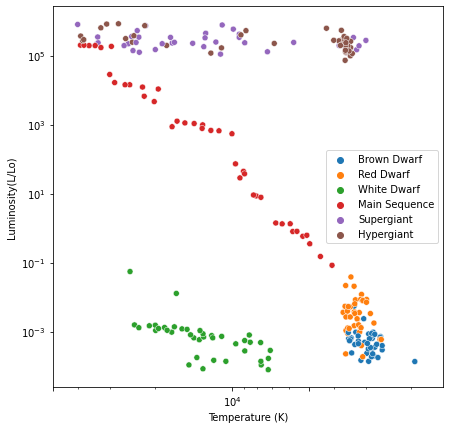

In [7]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

Only numerical values in the dataset are being taken into account.

In [8]:
new_df_stars = df_stars.drop(["Star color", "Spectral Class", "Star type"], axis=1)

In [9]:
new_df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [10]:
X_array = np.array(new_df_stars)

**Principal Component Analysis**

In [11]:
pca = PCA(n_components=2)
X_s = pca.fit_transform(X_array)

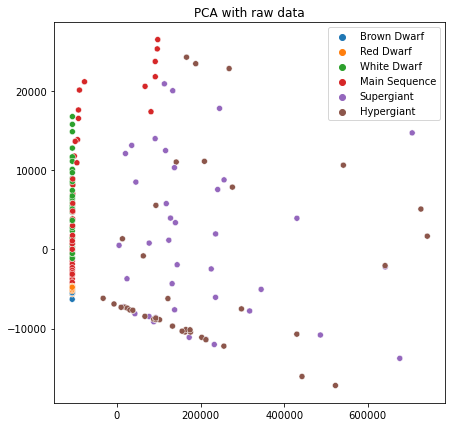

In [12]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x=X_s[:,0], y=X_s[:,1], hue=labels)
plt.title("PCA with raw data")
plt.show()

The result with raw data is not very good. So i proceed with scaling the dataset through *StandardScaler*, which removes the mean and scales to unit variance.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(new_df_stars)

pca = PCA(n_components=2)
X_s = pca.fit_transform(X)

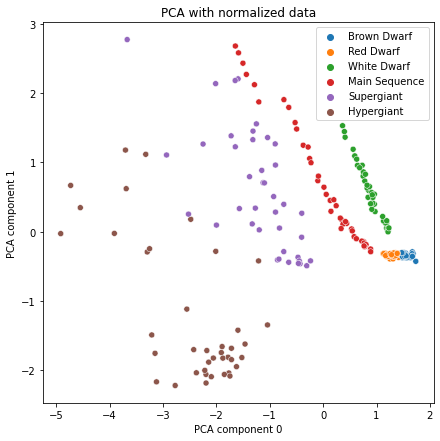

In [24]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x=X_s[:,0], y=X_s[:,1], hue=labels)
plt.xlabel("PCA component 0")
plt.ylabel("PCA component 1")

plt.title("PCA with normalized data")
plt.show()

The result is obviously better with scaled dataset.

In [26]:
print(f"The first component explains {100*pca.explained_variance_ratio_[0]:.1f}% of the variance in the data.")
print(f"The second component explains {100*pca.explained_variance_ratio_[1]:.1f}% of the variance in the data.")

The first component explains 60.4% of the variance in the data.
The second component explains 23.5% of the variance in the data.


I now run a **Decision Tree Classifier**:

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_s, labels, test_size=0.3, random_state=42)

In [46]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza del modello: {accuracy:.8f}")
print(classification_report(y_test, y_pred))

Accuratezza del modello: 0.94444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.93      0.90        15
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00        12
           4       0.82      0.82      0.82        11
           5       1.00      1.00      1.00        10

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.94        72
weighted avg       0.95      0.94      0.94        72



The classifier seems to work pretty well.